In [1]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [2]:
import numpy as np
from scipy.spatial import KDTree

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import pickle

from collections import defaultdict
from copy import deepcopy
from heapq import *

from gPRM import gPRM

In [3]:
g = open("data-4_19_20.pkl","rb")
loaded_output_file = pickle.load(g)
g.close()

In [7]:
# make a pandas dataframe for seaborn

arrays_for_dataframe = []
arrays_for_log_dataframe = []

for D in loaded_output_file.keys():
    for n in loaded_output_file[D].keys():
        for r in loaded_output_file[D][n].keys():
            for error in loaded_output_file[D][n][r]:
                arrays_for_dataframe.append([D, n, r, error])
                arrays_for_log_dataframe.append([D, n, r, -1* np.log(error)])
                
df = pd.DataFrame(arrays_for_dataframe)
df.columns = ['D', 'n', 'r', 'relative_error']

log_df = pd.DataFrame(arrays_for_log_dataframe)
log_df.columns = ['D', 'n', 'r', 'log_relative_error']

df_1 = df[df['r'] == 1]
df_2 = df[df['r'] == 2]
df_3 = df[df['r'] == 3]

In [23]:
df.loc[df['r'] == 1].loc[df['n'] == 100].loc[df['D'] == 2]

,D,n,r,relative_error
0,2,100,1,0.040065
1,2,100,1,0.005229
2,2,100,1,0.033410
3,2,100,1,0.054423
4,2,100,1,0.013630
5,2,100,1,0.021317
6,2,100,1,0.068759
7,2,100,1,0.031184
8,2,100,1,0.026037
9,2,100,1,0.015307


In [9]:
log_df

,D,n,r,log_relative_error
0,2,100,1,3.217260
1,2,100,1,5.253448
2,2,100,1,3.398890
3,2,100,1,2.910962
4,2,100,1,4.295474
...,...,...,...,...
1194,4,1000,3,5.302482
1195,4,1000,3,4.426587
1196,4,1000,3,4.728636
1197,4,1000,3,4.465620


In [45]:
sns.set(style='whitegrid')

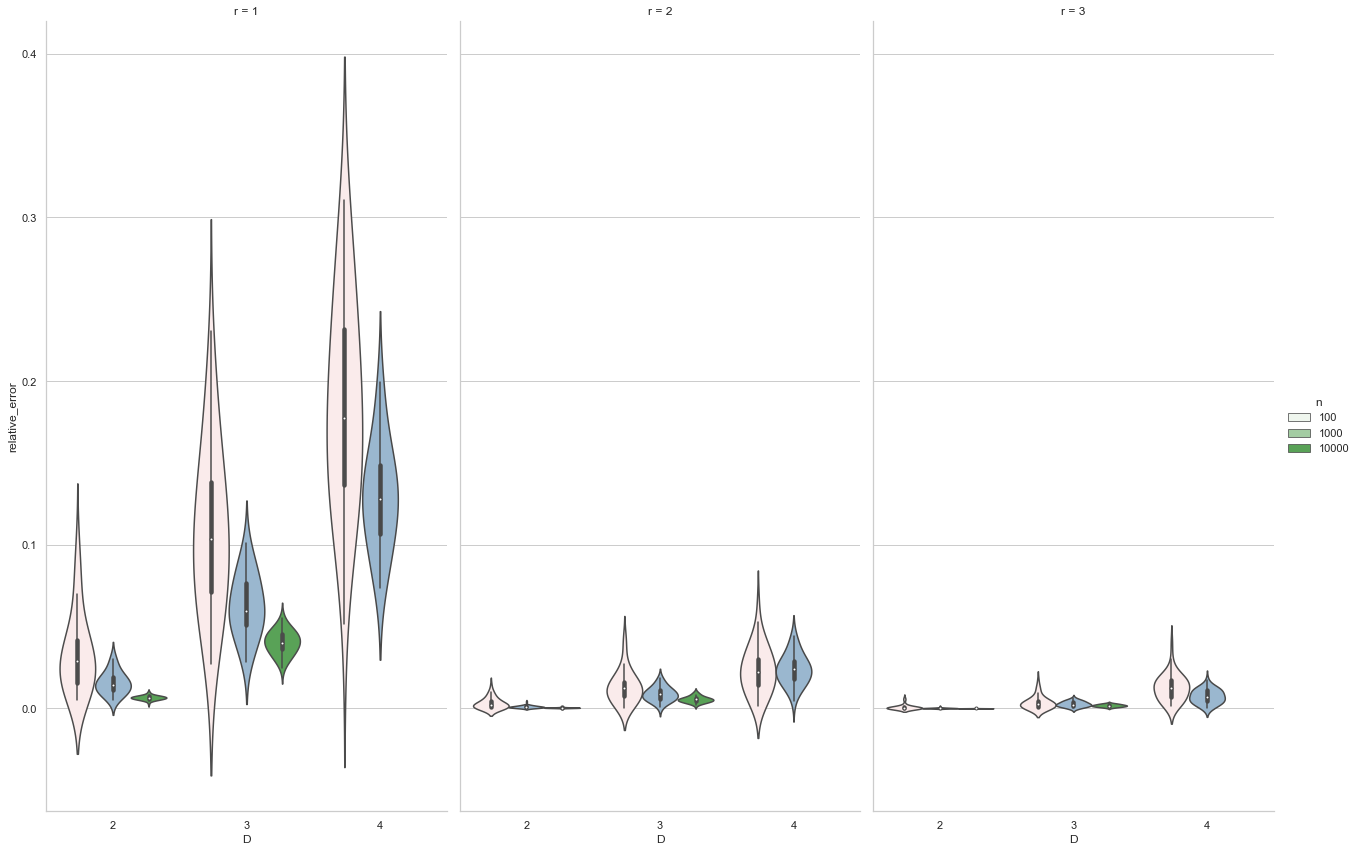

In [46]:
plot = sns.FacetGrid(df, col='r', hue='n', palette='Set1', height=12, aspect=0.5, legend_out=True)
plot.map(sns.violinplot, 'D', 'relative_error', hue=df['n'], bw=0.7, order=[2,3,4])
plot.add_legend()

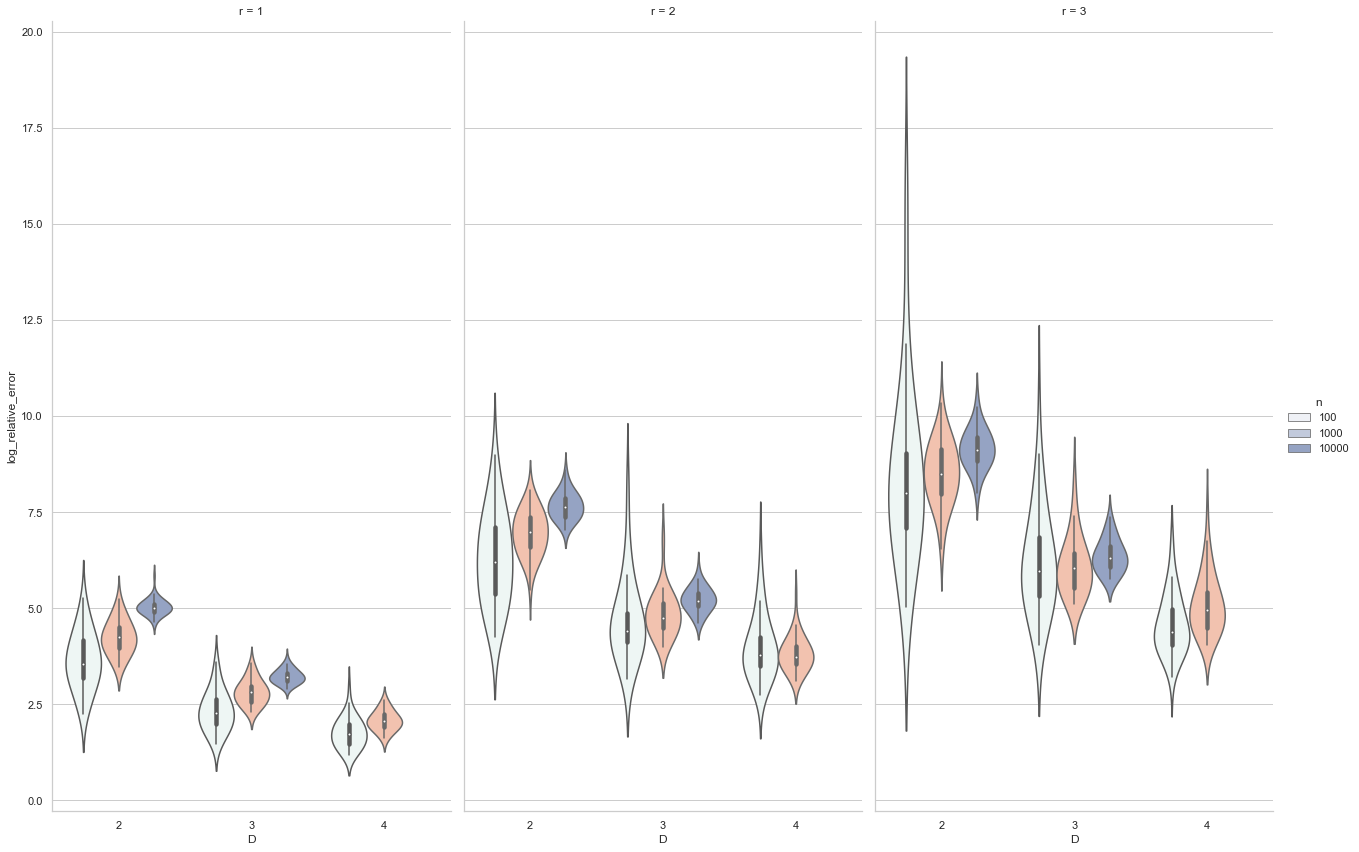

In [47]:
log_plot = sns.FacetGrid(log_df, col='r', hue='n', palette='Set2', height=12, aspect=0.5, legend_out=True)
log_plot.map(sns.violinplot, 'D', 'log_relative_error', hue=log_df['n'], bw=0.7, order=[2,3,4])
log_plot.add_legend()

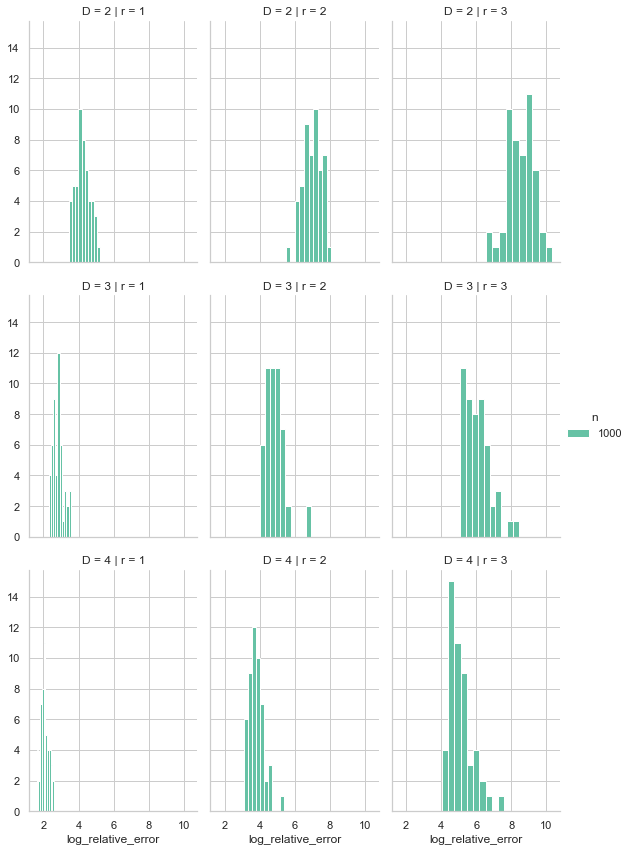

In [59]:
log_histogram = sns.FacetGrid(log_df.loc[log_df['n'] == 1000], col='r', row='D', hue='n', palette='Set2', height=4, aspect=4/6, legend_out=True)
log_histogram.map(plt.hist, 'log_relative_error')
log_histogram.add_legend()

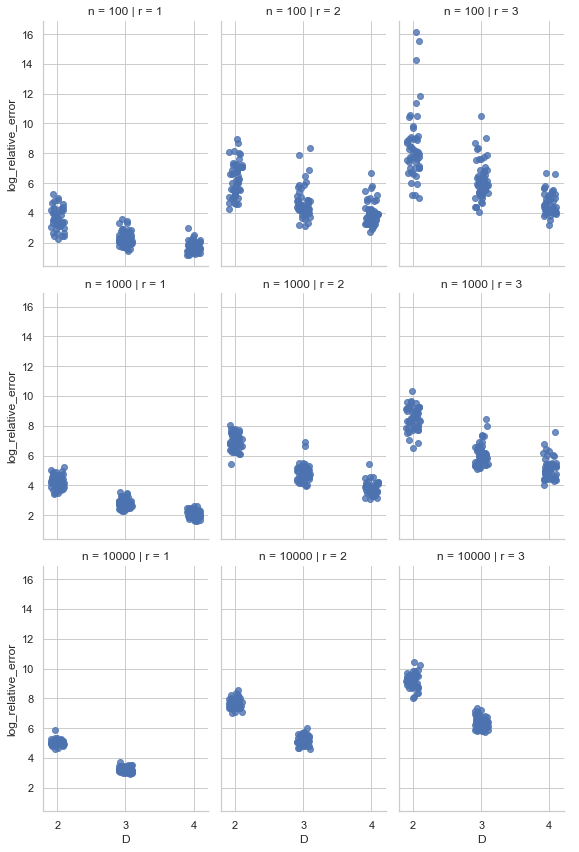

In [70]:
g = sns.FacetGrid(log_df, col='r', row='n', palette='Set2', height=4, aspect=4/6, legend_out=True)
g.map(sns.regplot, "D", "log_relative_error", fit_reg=False, x_jitter=0.1)
g.add_legend();